# Tesla Stock Market Prediction


Context The subject matter of this dataset explores Tesla's stock price from its initial public offering (IPO) to yesterday.

Content Within the dataset one will encounter the following:

The date - "Date"

The opening price of the stock - "Open"

The high price of that day - "High"

The low price of that day - "Low"

The closed price of that day - "Close"

The amount of stocks traded during that day - "Volume"

The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"

Acknowledgements Through Python programming and checking Sentdex out, I acquired the data from Yahoo Finance. The time period represented starts from 06/29/2010 to 03/17/2017.

# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df=pd.read_csv("C:/Users/shapunya vemula/Downloads/Tesla.csv - Tesla.csv.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

# Calculating High-Low Price Percentage and Close-Open Percentage to understand the trend

In [5]:
df["HL_Perc"] = ((df["High"]-df["Low"])/df["Low"]) * 100
df["CO_Perc"] = ((df["Close"] - df["Open"])/df["Open"]) * 100

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,HL_Perc,CO_Perc
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,42.531349,25.736837
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30.557946,-7.599848
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,27.873705,-12.160004
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,23.463395,-16.521735
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,26.342388,-19.449995


In [7]:
dates = np.array(df["Date"])
dates

array(['6/29/2010', '6/30/2010', '7/1/2010', ..., '3/15/2017',
       '3/16/2017', '3/17/2017'], dtype=object)

Appending the last 30 rows of Dates Column for Prediction purpose

In [8]:
dates = dates[:-30]
dates_Check = dates[-30:]

In [9]:
df = df[["HL_Perc","CO_Perc","Adj Close","Volume"]]

In [10]:
df.head()

,HL_Perc,CO_Perc,Adj Close,Volume
0,42.531349,25.736837,23.889999,18766300
1,30.557946,-7.599848,23.830000,17187100
2,27.873705,-12.160004,21.959999,8218800
3,23.463395,-16.521735,19.200001,5139800
4,26.342388,-19.449995,16.110001,6866900


Creating New column by shifting the Adjusted Closing rows by 30 which will be used for Prediction

In [11]:
df["Price Next Month"] = df["Adj Close"].shift(-30)

In [12]:
df.head()

,HL_Perc,CO_Perc,Adj Close,Volume,Price Next Month
0,42.531349,25.736837,23.889999,18766300,17.900000
1,30.557946,-7.599848,23.830000,17187100,17.600000
2,27.873705,-12.160004,21.959999,8218800,18.320000
3,23.463395,-16.521735,19.200001,5139800,18.780001
4,26.342388,-19.449995,16.110001,6866900,19.150000


In [13]:
X = np.array(df.drop(["Price Next Month"], 1))

In [14]:
df.dropna(inplace = True)

In [15]:
y = np.array(df["Price Next Month"])

In [16]:
X = preprocessing.scale(X)

In [17]:
y.shape

(1662,)

In [18]:
X = X[:-30]
X_Check = X[-30:]

In [19]:
X.shape

(1662, 4)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Applying RandomForest Regression Algorithm

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [22]:
model.fit(X,y)

RandomForestRegressor()

In [23]:
model.score(X_test, y_test)

0.9948145185884281

In [24]:
predictions = model.predict(X_Check)

In [25]:
actual = pd.DataFrame(dates, columns=["Dates"])
actual["Close Price"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Dates", inplace = True)

forecast = pd.DataFrame(dates_Check, columns = ["Dates"])
forecast["Close Price"] = np.nan
forecast["Forecast"] = predictions
forecast.set_index("Dates", inplace = True)
var = [actual, forecast]
Predicted_Output = pd.concat(var)

# Plotting Graph with the existing values and the Predicted Values

Text(0, 0.5, 'Price')

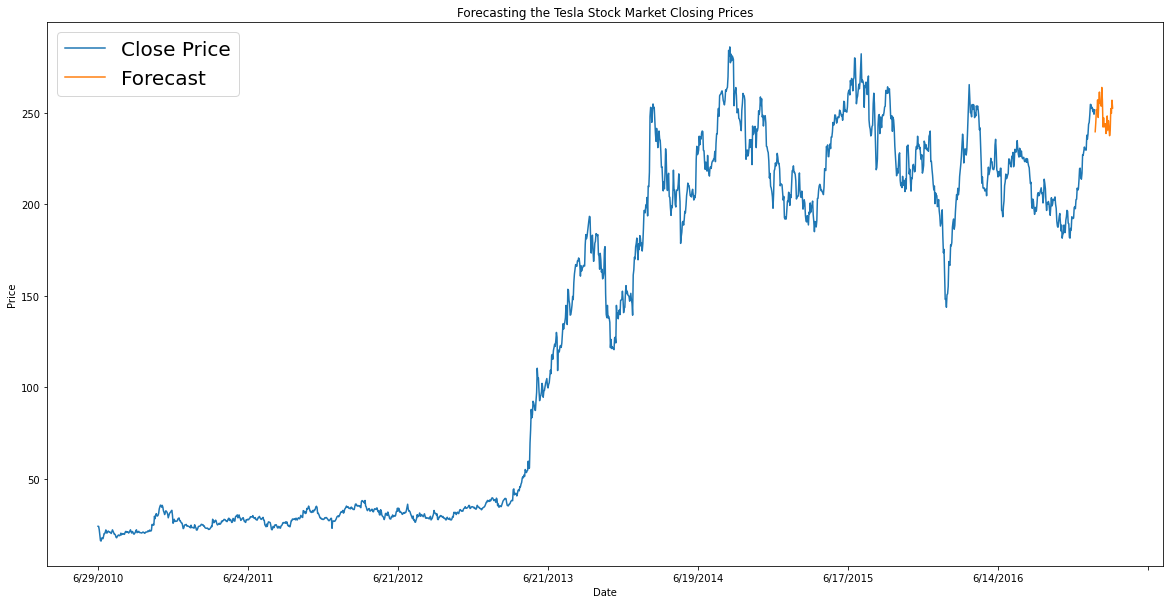

In [26]:
Predicted_Output.plot(figsize=(20,10), linewidth=1.5, title = "Forecasting the Tesla Stock Market Closing Prices")
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')